<a href="https://colab.research.google.com/github/Ahmed-M-Elshazly/Homework-6/blob/main/Homework_6_Problem_1_b_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 6
#problem 1-b
#Ahmed Elshazly
#801420724

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import time
from datetime import timedelta

In [ ]:
file_path = url = 'https://raw.githubusercontent.com/Ahmed-M-Elshazly/Database/main/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:

def fur_map(x):
    return {'furnished': 3, 'semi-furnished': 2, 'unfurnished': 1}.get(x, x)

housing['furnishingstatus'] = housing['furnishingstatus'].map(fur_map)

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})
housing[varlist] = housing[varlist].apply(binary_map)



In [ ]:
stander=StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','furnishingstatus']
housing[num_vars] = stander.fit_transform(housing[num_vars])
Y=housing.pop("price")
X=housing
Y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [ ]:
X = torch.tensor(X.values)
Y = torch.tensor(Y.values)
n_samples=X.shape[0]
n_val=int(0.2*n_samples)
shuffled_indices=torch.randperm(n_samples)

train_indices=shuffled_indices[ : -n_val]
val_indices=shuffled_indices[-n_val :]

train_X=X[train_indices]
train_Y=Y[train_indices]

val_X=X[val_indices]
val_Y=Y[val_indices]

train_X = train_X.float()
val_X = val_X.float()
train_Y = train_Y.float()
val_Y = val_Y.float()

In [ ]:
train_X.shape[1]

12

In [ ]:
def train (n_epochs, model, optimizer, loss_fn, x_train, y_train, x_val, y_val):
  train_rmse_list = []
  val_rmse_list = []
  for epoch in range(n_epochs+1):
    train_x_p=model(x_train)
    train_loss=loss_fn(train_x_p,y_train)

    with torch.no_grad():
      val_x_p=model(x_val)
      val_loss=loss_fn(val_x_p,y_val)
      assert val_loss.requires_grad==False

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_rmse = torch.sqrt(train_loss).detach().item()
    train_rmse_list.append(train_rmse)
    val_rmse = torch.sqrt(val_loss).detach().item()
    val_rmse_list.append(val_rmse)

    if epoch % 500==0:
      print(f"Epoch {epoch}, Training RMSE {train_rmse:.4f}, Validation RMSE {val_rmse:.4f}")

  return train_rmse_list, val_rmse_list

In [ ]:
def get_model_size(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([436])) that is different to the input size (torch.Size([436, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([109])) that is different to the input size (torch.Size([109, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Training RMSE 5056611.0000, Validation RMSE 5365810.5000
Epoch 500, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 1000, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 1500, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 2000, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 2500, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 3000, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 3500, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 4000, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 4500, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 5000, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Training time for learning rate 0.01: 0:00:09.626636
Model with learning rate 0.01:
  Total parameters: 191
  Trainable parameters: 191


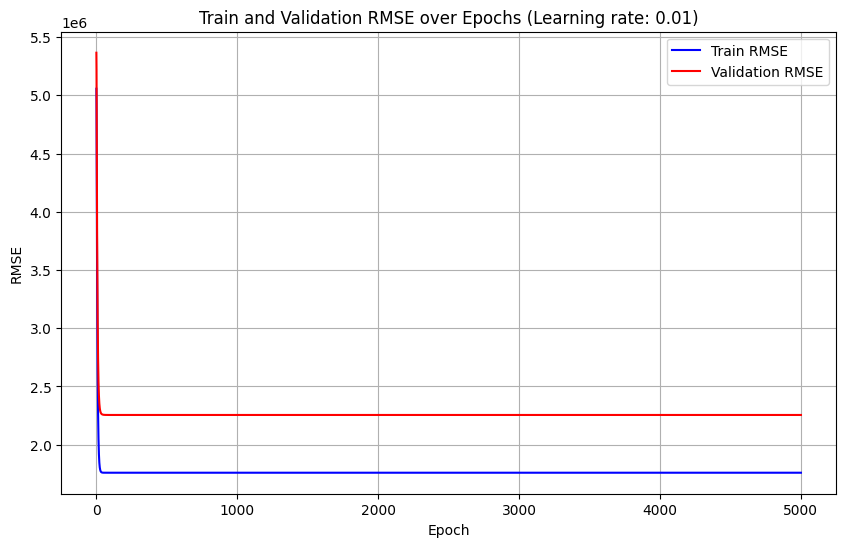

In [ ]:
number_of_epochs=5000
learning_rate=0.01
linear_model = nn.Sequential(
    nn.Linear(train_X.shape[1], 8),
    nn.Tanh(),
    nn.Linear(8, 6),
    nn.Tanh(),
    nn.Linear(6, 4),
    nn.Tanh(),
    nn.Linear(4, 1)
)
optimizer = optim.SGD(linear_model.parameters(), lr=learning_rate)
start_time = time.time()
train_rmse, val_rmse=train(
      n_epochs=number_of_epochs,
      model=linear_model,
      optimizer=optimizer,
      loss_fn=nn.MSELoss(),
      x_train=train_X,
      y_train=train_Y,
      x_val=val_X,
      y_val=val_Y
  )
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = str(timedelta(seconds=elapsed_time))
# Print the training time
print(f"Training time for learning rate {learning_rate}: {formatted_time}")
total_params, trainable_params = get_model_size(linear_model)
print(f"Model with learning rate {learning_rate}:")
print(f"  Total parameters: {total_params}")
print(f"  Trainable parameters: {trainable_params}")
#print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
plt.figure(figsize=(10, 6))
plt.plot(range(0, number_of_epochs+1), train_rmse, label='Train RMSE', color='blue')
plt.plot(range(0, number_of_epochs+1), val_rmse, label='Validation RMSE', color='red')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title(f'Train and Validation RMSE over Epochs (Learning rate: {learning_rate})')
plt.legend()
plt.grid(True)
plt.show()

Epoch 0, Training RMSE 5056610.5000, Validation RMSE 5365810.0000
Epoch 500, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 1000, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 1500, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 2000, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 2500, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 3000, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 3500, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 4000, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 4500, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 5000, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Training time for learning rate 0.1: 0:00:10.655053
Model with learning rate 0.1:
  Total parameters: 191
  Trainable parameters: 191


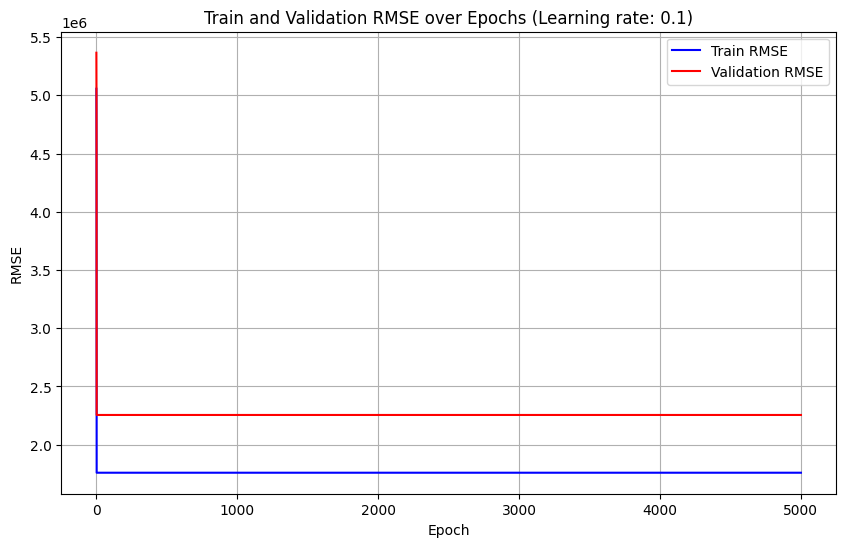

Epoch 0, Training RMSE 5056610.5000, Validation RMSE 5365810.0000
Epoch 500, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 1000, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 1500, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 2000, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 2500, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 3000, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 3500, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 4000, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 4500, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Epoch 5000, Training RMSE 1759151.0000, Validation RMSE 2255116.5000
Training time for learning rate 0.01: 0:00:10.711396
Model with learning rate 0.01:
  Total parameters: 191
  Trainable parameters: 191


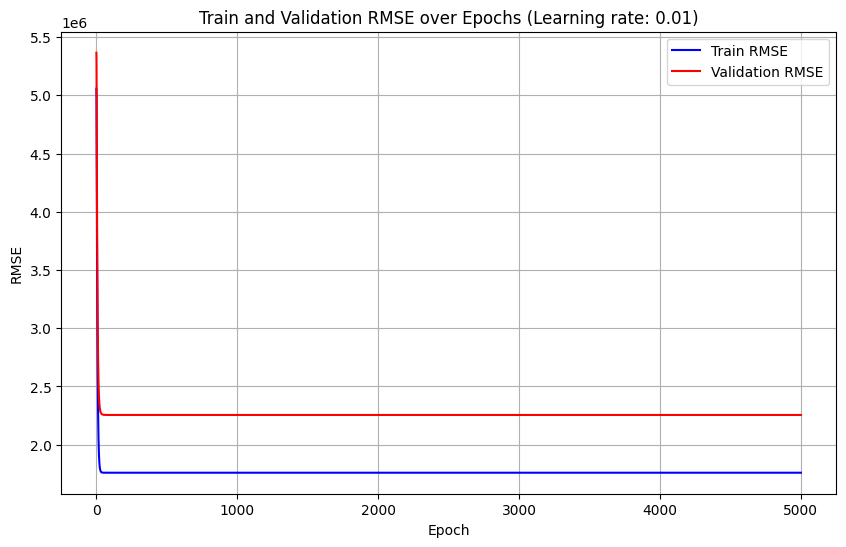

Epoch 0, Training RMSE 5056610.5000, Validation RMSE 5365810.0000
Epoch 500, Training RMSE 1759431.3750, Validation RMSE 2257143.5000
Epoch 1000, Training RMSE 1759151.0000, Validation RMSE 2255128.2500
Epoch 1500, Training RMSE 1759151.0000, Validation RMSE 2255117.2500
Epoch 2000, Training RMSE 1759151.0000, Validation RMSE 2255117.2500
Epoch 2500, Training RMSE 1759151.0000, Validation RMSE 2255117.2500
Epoch 3000, Training RMSE 1759151.0000, Validation RMSE 2255117.2500
Epoch 3500, Training RMSE 1759151.0000, Validation RMSE 2255117.2500
Epoch 4000, Training RMSE 1759151.0000, Validation RMSE 2255117.2500
Epoch 4500, Training RMSE 1759151.0000, Validation RMSE 2255117.2500
Epoch 5000, Training RMSE 1759151.0000, Validation RMSE 2255117.2500
Training time for learning rate 0.001: 0:00:10.618262
Model with learning rate 0.001:
  Total parameters: 191
  Trainable parameters: 191


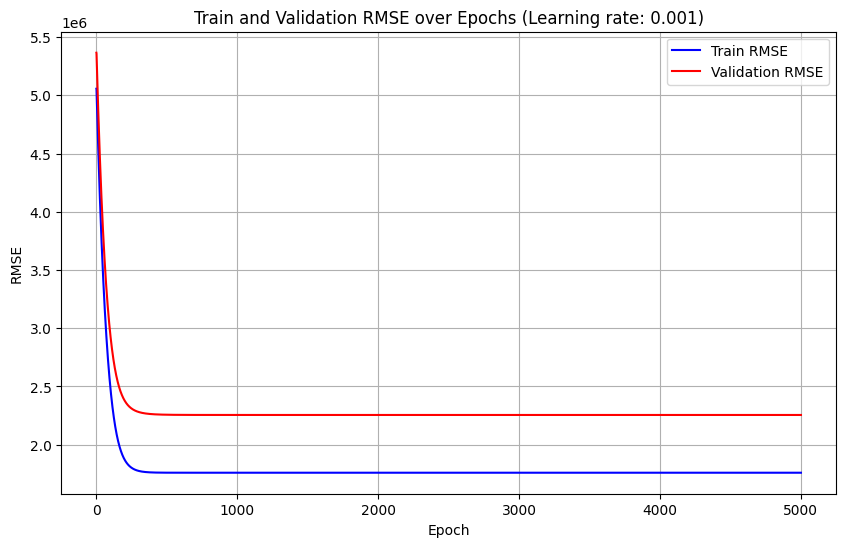

Epoch 0, Training RMSE 5056610.0000, Validation RMSE 5365809.5000
Epoch 500, Training RMSE 3371881.7500, Validation RMSE 3756047.0000
Epoch 1000, Training RMSE 2477354.2500, Validation RMSE 2929404.0000
Epoch 1500, Training RMSE 2052655.2500, Validation RMSE 2545414.2500
Epoch 2000, Training RMSE 1872426.2500, Validation RMSE 2379821.5000
Epoch 2500, Training RMSE 1801629.3750, Validation RMSE 2310378.5000
Epoch 3000, Training RMSE 1774888.0000, Validation RMSE 2280884.7500
Epoch 3500, Training RMSE 1764953.7500, Validation RMSE 2267851.7500
Epoch 4000, Training RMSE 1761286.7500, Validation RMSE 2261768.5000
Epoch 4500, Training RMSE 1759936.6250, Validation RMSE 2258755.5000
Epoch 5000, Training RMSE 1759439.8750, Validation RMSE 2257177.5000
Training time for learning rate 0.0001: 0:00:10.442326
Model with learning rate 0.0001:
  Total parameters: 191
  Trainable parameters: 191


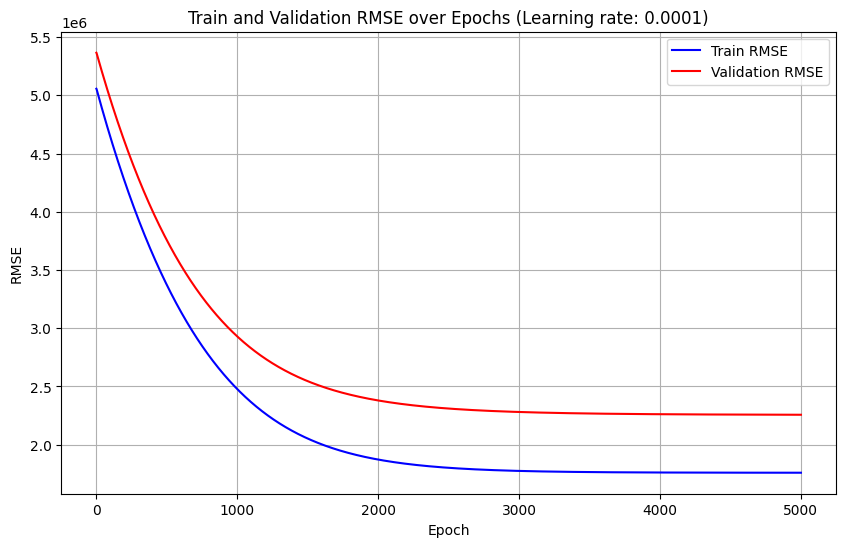

In [ ]:
number_of_epochs=5000
learning_rates=[0.1,0.01,0.001,0.0001]

for learning_rate in learning_rates:
    linear_model = nn.Sequential(
    nn.Linear(train_X.shape[1], 8),
    nn.Tanh(),
    nn.Linear(8, 6),
    nn.Tanh(),
    nn.Linear(6, 4),
    nn.Tanh(),
    nn.Linear(4, 1)
  )
    optimizer = optim.SGD(linear_model.parameters(), lr=learning_rate)
    start_time = time.time()


    train_rmse, val_rmse=train(
          n_epochs=number_of_epochs,
          model=linear_model,
          optimizer=optimizer,
          loss_fn=nn.MSELoss(),
          x_train=train_X,
          y_train=train_Y,
          x_val=val_X,
          y_val=val_Y
      )
    end_time = time.time()
    elapsed_time = end_time - start_time
    formatted_time = str(timedelta(seconds=elapsed_time))
    # Print the training time
    print(f"Training time for learning rate {learning_rate}: {formatted_time}")
    total_params, trainable_params = get_model_size(linear_model)
    print(f"Model with learning rate {learning_rate}:")
    print(f"  Total parameters: {total_params}")
    print(f"  Trainable parameters: {trainable_params}")
    #print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
    plt.figure(figsize=(10, 6))
    plt.plot(range(0, number_of_epochs+1), train_rmse, label='Train RMSE', color='blue')
    plt.plot(range(0, number_of_epochs+1), val_rmse, label='Validation RMSE', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.title(f'Train and Validation RMSE over Epochs (Learning rate: {learning_rate})')
    plt.legend()
    plt.grid(True)
    plt.show()